In [87]:
import numpy as np
import scipy as sp
import arviz as az
from src.baseSIR import mle
from src.baseSIR import mle_sir
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import time

In [88]:
N_10_b = np.genfromtxt(f"../Data/N_10_b.csv", delimiter= ",")
N_100_b = np.genfromtxt(f"../Data/N_100_b.csv", delimiter= ",")
N_1000_b = np.genfromtxt(f"../Data/N_1000_b.csv", delimiter= ",")

N_10_g = np.genfromtxt(f"../Data/N_10_g.csv", delimiter= ",")
N_100_g = np.genfromtxt(f"../Data/N_100_g.csv", delimiter= ",")
N_1000_g = np.genfromtxt(f"../Data/N_1000_g.csv", delimiter= ",")

In [89]:
plot_traj_b = np.empty(shape=(10,4))
plot_traj_g = np.empty(shape=(10,4))
box_b = np.empty(shape= (30,2))
box_g = np.empty(shape= (30,2))

for i in range(10):
    plot_traj_b[i,0] = i +1
    plot_traj_b[i,1] = N_10_b[:,0][i]
    plot_traj_b[i,2] = N_100_b[:,0][i]
    plot_traj_b[i,3] = N_1000_b[:,0][i]

    plot_traj_g[i,0] = i +1
    plot_traj_g[i,1] = N_10_g[:,0][i]
    plot_traj_g[i,2] = N_100_g[:,0][i]
    plot_traj_g[i,3] = N_1000_g[:,0][i]

for j in range(30):
    if j < 10:
        box_b[j,0] = N_10_b[:,0][j]
        box_b[j,1] = "10"

        box_g[j,0] = N_10_g[:,0][j]
        box_g[j,1] = "10"
    elif 10 <= j < 20:
        box_b[j,0] = N_100_b[:,0][j-10]
        box_b[j,1] = "100"

        box_g[j,0] = N_100_g[:,0][j-10]
        box_g[j,1] = "100"
    else:
        box_b[j,0] = N_1000_b[:,0][j-20]
        box_b[j,1] = "1000"

        box_g[j,0] = N_1000_g[:,0][j-20]
        box_g[j,1] = "1000"

In [90]:
mle_b = np.genfromtxt("../Data/MLE_b.csv", delimiter=",")
mle_g = np.genfromtxt("../Data/MLE_g.csv", delimiter=",")

In [91]:
test_b = N_1000_b[:,0]
test_g = N_1000_g[:,0]

In [92]:
print(sp.stats.ttest_rel(mle_b,test_b))
print(sp.stats.ttest_rel(mle_g,test_g))

TtestResult(statistic=-2.3121055002982187, pvalue=0.046077435451965215, df=9)
TtestResult(statistic=2.9322102344678505, pvalue=0.016696882857737287, df=9)


In [93]:
mle_N = ["MLE_1000"]*10
mle_B = {"b":mle_b,"N":mle_N}
df_mle_b = pd.DataFrame(mle_B, columns=("b","N"))
mle_G = {"g":mle_g,"N":mle_N}
df_mle_g = pd.DataFrame(mle_G, columns=("g","N"))

In [94]:
df_b = pd.DataFrame(box_b)
df_g =pd.DataFrame(box_g)
df_b.columns = ["b","N"]
df_g.columns = ["g","N"]
df_b = pd.concat([df_b,df_mle_b])
df_g = pd.concat([df_g,df_mle_g])

<Axes: xlabel='N', ylabel='b'>

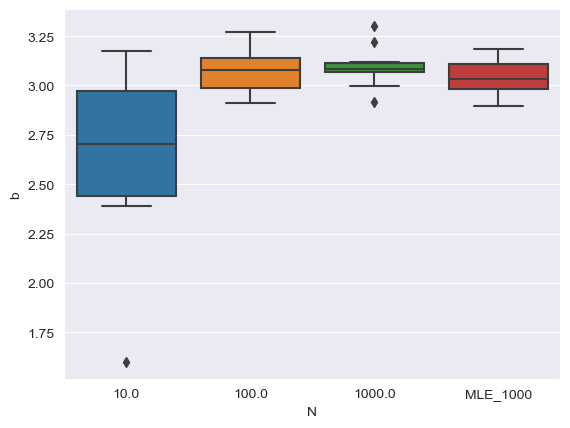

In [95]:
sns.boxplot(df_b,x="N",y="b")

<Axes: xlabel='N', ylabel='g'>

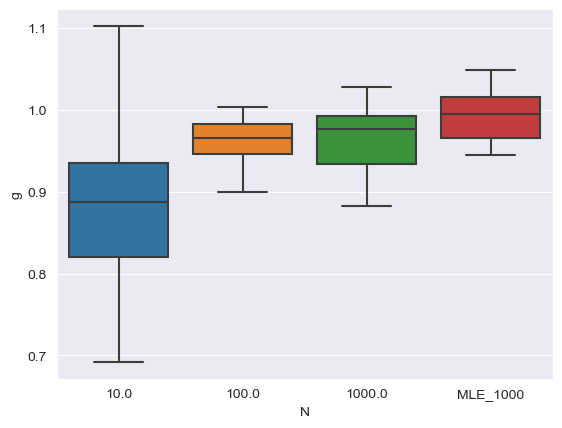

In [96]:
sns.boxplot(df_g,x="N",y="g")

<bound method Figure.show of <Figure size 640x480 with 1 Axes>>

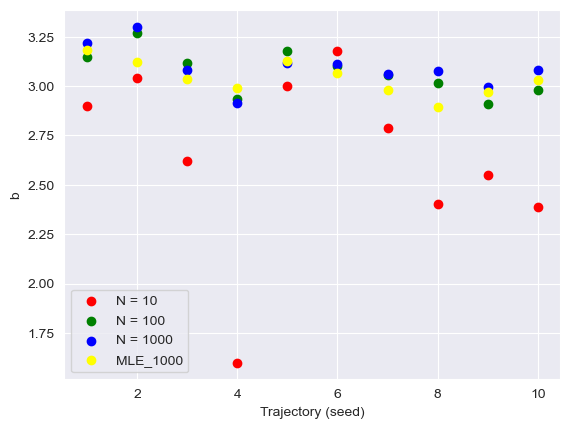

In [97]:
fig, ax0 = plt.subplots()
ax0.scatter(plot_traj_b[:,0],plot_traj_b[:,1], color = "red", label = "N = 10")
ax0.scatter(plot_traj_b[:,0],plot_traj_b[:,2], color = "green", label = "N = 100")
ax0.scatter(plot_traj_b[:,0],plot_traj_b[:,3], color = "blue", label = "N = 1000")
ax0.scatter(plot_traj_b[:,0],mle_b, color = "yellow", label = "MLE_1000")
ax0.set_xlabel("Trajectory (seed)")
ax0.set_ylabel("b")
ax0.legend()
fig.show

<bound method Figure.show of <Figure size 640x480 with 1 Axes>>

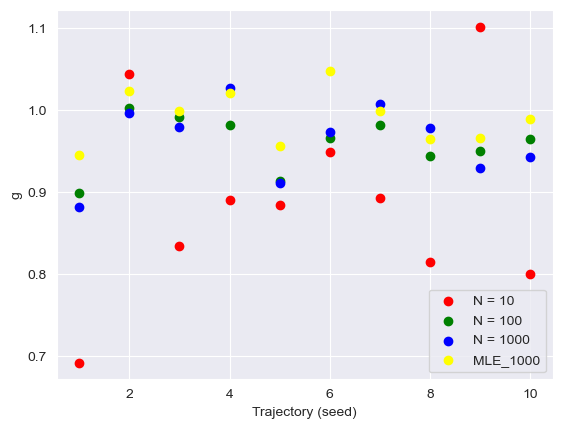

In [98]:
fig, ax0 = plt.subplots()
ax0.scatter(plot_traj_g[:, 0], plot_traj_g[:, 1], color="red", label="N = 10")
ax0.scatter(plot_traj_g[:, 0], plot_traj_g[:, 2], color="green", label="N = 100")
ax0.scatter(plot_traj_g[:, 0], plot_traj_g[:, 3], color="blue", label="N = 1000")
ax0.scatter(plot_traj_g[:,0],mle_g, color = "yellow", label = "MLE_1000")
ax0.set_xlabel("Trajectory (seed)")
ax0.set_ylabel("g")
ax0.legend()
fig.show